Node-coloring

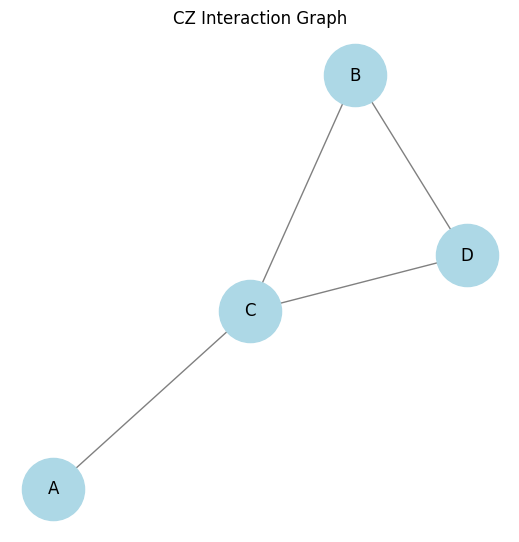

Optimized Stages for CZ Graph Execution:
Stage 0: C
Stage 1: A, B
Stage 2: D


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph coloring algorithm taken from Ruan et al. (arxiv.org/2411.12263v1)

def assign_color(vertex, color, graph):
    """ Assigns the smallest available color to a vertex. """
    available_colors = [True] * len(graph.nodes)

    for neighbor in graph.adj[vertex]:
        if color[neighbor] != -1:
            available_colors[color[neighbor]] = False  # Mark used colors as unavailable

    # Assign the smallest available color
    for c in range(len(graph.nodes)):
        if available_colors[c]:
            color[vertex] = c
            break

def optimized_coloring(edges):
    """ Computes an optimized coloring for a CZ interaction graph.
        NOTE: nodes represent CZ gates, edges represent nodes where CZ gates interact
    """

    # Create the graph
    graph = nx.Graph()
    graph.add_edges_from(edges)

    # Number of vertices
    num_vertices = len(graph.nodes)

    # Initialize color dictionary
    color = {node: -1 for node in graph.nodes}

    # Sort vertices by descending degree
    sorted_vertices = sorted(graph.nodes, key=lambda v: len(graph.adj[v]), reverse=True)

    # Assign colors using greedy algorithm
    for vertex in sorted_vertices:
        assign_color(vertex, color, graph)

    # Collect stages
    stages = {}
    for node, c in color.items():
        if c not in stages:
            stages[c] = []
        stages[c].append(node)

    return stages

def visualize_graph(edges):
    """ Visualizes a graph given a list of edges. """
    G = nx.Graph()
    G.add_edges_from(edges)

    # Draw the graph with labels
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)

    # Show the graph
    plt.title("CZ Interaction Graph")
    plt.show()

# Example Usage:
edges = [("A", "B"), ("A", "D"), ("B", "C"), ("C", "D"), ("C","E"),("A","C")]  # Define the CZ interaction graph
edges = [("A", "C"), ("B", "C"), ("C", "D"), ("D","B")]  # Define the CZ interaction graph
visualize_graph(edges)
stages = optimized_coloring(edges)

# Display results
print("Optimized Stages for CZ Graph Execution:")
for stage, nodes in sorted(stages.items()):
    print(f"Stage {stage}: {', '.join(nodes)}")

<ipython-input-56-68cb943a8b9c>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_colors))  # Use "tab10" colormap


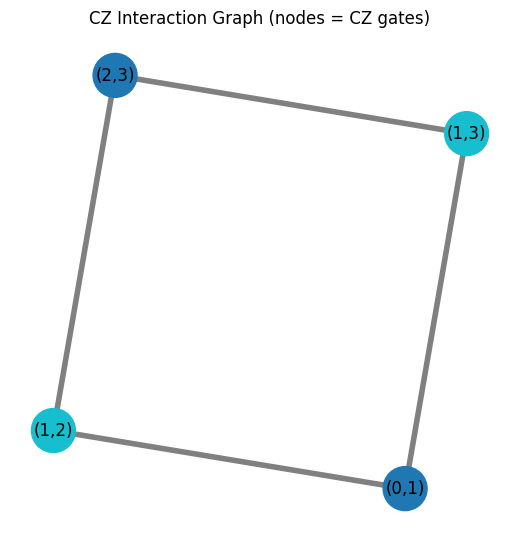

Optimized Stages for CZ Graph Execution:
Stage 0: (0,1), (2,3)
Stage 1: (1,3), (1,2)


In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph coloring algorithm taken from Ruan et al. (arxiv.org/2411.12263v1)

def assign_color(vertex, color, graph):
    """ Assigns the smallest available color to a vertex. """
    available_colors = [True] * len(graph.nodes)

    for neighbor in graph.adj[vertex]:
        if color[neighbor] != -1:
            available_colors[color[neighbor]] = False  # Mark used colors as unavailable

    # Assign the smallest available color
    for c in range(len(graph.nodes)):
        if available_colors[c]:
            color[vertex] = c
            break

def optimized_coloring(edges):
    """ Computes an optimized coloring for a CZ interaction graph.
        NOTE: nodes represent CZ gates, edges represent nodes where CZ gates interact
    """

    # Create the graph
    graph = nx.Graph()
    graph.add_edges_from(edges)

    # Initialize color dictionary
    color = {node: -1 for node in graph.nodes}

    # Sort vertices by descending degree
    sorted_vertices = sorted(graph.nodes, key=lambda v: len(graph.adj[v]), reverse=True)

    # Assign colors using greedy algorithm
    for vertex in sorted_vertices:
        assign_color(vertex, color, graph)

    # Collect stages
    stages = {}
    for node, c in color.items():
        if c not in stages:
            stages[c] = []
        stages[c].append(node)

    return stages, color  # Return both stages and color mapping

def visualize_graph(edges, color_map):
    """ Visualizes the graph with node colors based on execution stages. """
    G = nx.Graph()
    G.add_edges_from(edges)

    # Assign colors based on stages
    unique_colors = list(set(color_map.values()))
    cmap = plt.cm.get_cmap("tab10", len(unique_colors))  # Use "tab10" colormap

    # Map each node to its corresponding color
    node_colors = [cmap(color_map[node]) for node in G.nodes]

    # Draw the graph
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color=node_colors, width=4, edge_color='gray',
            node_size=1000, font_size=12, cmap=cmap)

    # Show the graph
    plt.title("CZ Interaction Graph (nodes = CZ gates)")
    plt.axis("off")  # Remove the border
    plt.show()

# Example Usage:
edges = [("(0,1)", "(1,3)"), ("(0,1)", "(1,2)"), ("(1,2)", "(2,3)"), ("(2,3)", "(1,3)")]  # Define the CZ interaction graph
stages, color_map = optimized_coloring(edges)

# Visualize the graph with nodes colored by execution stages
visualize_graph(edges, color_map)

# Display results
print("Optimized Stages for CZ Graph Execution:")
for stage, nodes in sorted(stages.items()):
    print(f"Stage {stage}: {', '.join(nodes)}")

Edge-coloring

Sorted Edge Groups by Size:
[(1, 2)]
[(1, 3)]
[(0, 1), (2, 3)]


<ipython-input-149-be5ac51113b3>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(unique_colors))  # Use "tab10" colormap


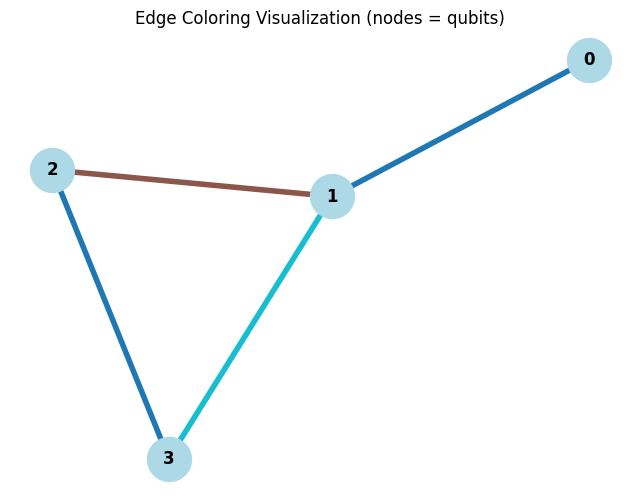

In [149]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def edge_coloring(graph):
    """
    Returns an edge coloring using the greedy method.
    Ensures that no two edges incident on the same vertex have the same color.
    """
    edge_colors = {}  # Dictionary to store edge colors
    max_degree = max(dict(graph.degree()).values())  # Maximum degree of the graph
    available_colors = list(range(max_degree + 1))  # At most Δ+1 colors (Vizing's Theorem)

    # Sort edges by the degree of their endpoints (larger first for better ordering)
    edges = sorted(graph.edges(), key=lambda e: max(graph.degree[e[0]], graph.degree[e[1]]), reverse=True)

    for edge in edges:
        u, v = edge
        # Find used colors of adjacent edges
        used_colors = set(edge_colors.get((min(x, y), max(x, y)), -1) for x, y in graph.edges(u)) | \
                      set(edge_colors.get((min(x, y), max(x, y)), -1) for x, y in graph.edges(v))

        # Assign the lowest available color
        for color in available_colors:
            if color not in used_colors:
                edge_colors[(min(u, v), max(u, v))] = color
                break

    return edge_colors

def group_and_sort_edges(edge_colors):
    """
    Groups edges by their assigned color and sorts the lists in ascending order of size.

    :param edge_colors: Dictionary where keys are edges (tuples) and values are colors (integers)
    :return: A list of lists of edges, sorted by list size in ascending order.
    """
    # Step 1: Group edges by color
    color_groups = defaultdict(list)
    for edge, color in edge_colors.items():
        color_groups[color].append(edge)

    # Step 2: Sort the lists by size
    sorted_edge_groups = sorted(color_groups.values(), key=len)

    return sorted_edge_groups

def draw_colored_graph(graph, edge_colors):
    """
    Draws the graph with edges colored based on the assigned colors.
    """
    # pos = nx.spring_layout(graph, seed=42)  # Positioning for visualization
    pos = nx.kamada_kawai_layout(graph)
    plt.figure(figsize=(8, 6))

    # Generate a color map
    unique_colors = list(set(edge_colors.values()))
    color_map = plt.cm.get_cmap("tab10", len(unique_colors))  # Use "tab10" colormap

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_size=1000, node_color="lightblue")

    # Draw edges with assigned colors
    for edge, color in edge_colors.items():
        nx.draw_networkx_edges(graph, pos, edgelist=[edge], width=4, edge_color=[color_map(color)])

    # Draw labels
    nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold")

    plt.title("Edge Coloring Visualization (nodes = qubits)")
    plt.axis("off")
    plt.show()

# Example usage
G = nx.Graph()
edges4 = [('q_4', 'q_3'), ('q_0', 'q_1'), ('q_5', 'q_3'), ('q_7', 'q_6'), ('q_0', 'q_2'), ('q_8', 'q_6')]
edges = [(0,1),(1,2),(2,3),(3,1)]
G.add_edges_from(edges)  # Example graph (Cycle with chords)
edge_colors = edge_coloring(G)

# Get sorted edge groups
sorted_edge_groups = group_and_sort_edges(edge_colors)

# Print results
print("Sorted Edge Groups by Size:")
for group in sorted_edge_groups:
    print(group)

# Visualize the graph with colored edges
draw_colored_graph(G, edge_colors)

In [68]:
from collections import defaultdict

def group_and_sort_edges(edge_colors):
    """
    Groups edges by their assigned color and sorts the lists in ascending order of size.

    :param edge_colors: Dictionary where keys are edges (tuples) and values are colors (integers)
    :return: A list of lists of edges, sorted by list size in ascending order.
    """
    # Step 1: Group edges by color
    color_groups = defaultdict(list)
    for edge, color in edge_colors.items():
        color_groups[color].append(edge)

    # Step 2: Sort the lists by size
    sorted_edge_groups = sorted(color_groups.values(), key=len)

    return sorted_edge_groups

# # Example Usage:
# edge_colors = {
#     ("A", "B"): 1,
#     ("B", "C"): 2,
#     ("C", "D"): 1,
#     ("D", "E"): 3,
#     ("E", "F"): 2,
#     ("F", "G"): 3,
#     ("G", "H"): 3
# }

# Get sorted edge groups
sorted_edge_groups = group_and_sort_edges(edge_colors)

# Print results
print("Sorted Edge Groups by Size:")
for group in sorted_edge_groups:
    print(group)

Sorted Edge Groups by Size:
[(1, 2)]
[(1, 3)]
[(0, 1), (2, 3)]


<ipython-input-120-53c7c5a11623>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(unique_colors))  # Use "tab10" colormap


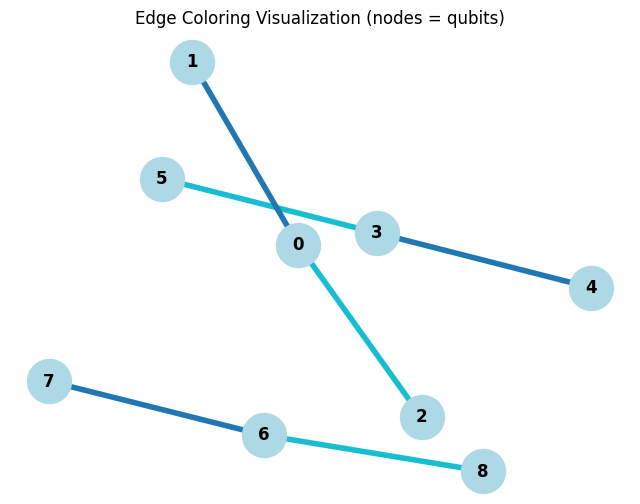

Edges ranked by overlap count:


In [122]:
from collections import Counter

def find_most_overlapping_edges(edge_colors, permutation):
    """
    Identifies edges in edge_colors that overlap the most with even-odd pairs in permutation.

    :param edge_colors: Dictionary where keys are edges (tuples of nodes) and values are colors.
    :param permutation: List of nodes in a given order.
    :return: Sorted list of edges (from edge_colors) ranked by their overlap count.
    """
    # Step 1: Convert edge keys into a set for O(1) lookup
    edge_set = set(edge_colors.keys())

    # Step 2: Extract even-odd pairs from permutation
    even_odd_pairs = [(permutation[j], permutation[j+1]) for j in range(0, len(permutation) - 1, 2)]

    # Step 3: Count overlaps
    edge_overlap_counter = Counter()

    for pair in even_odd_pairs:
        # Check both (u, v) and (v, u) since edges are undirected
        if pair in edge_set or (pair[1], pair[0]) in edge_set:
            edge_overlap_counter[pair] += 1

    # Step 4: Sort edges by highest overlap count
    sorted_edges = sorted(edge_overlap_counter.items(), key=lambda x: x[1], reverse=True)

    return sorted_edges

# # Example Usage
# edge_colors = {
#     ("A", "B"): 1,
#     ("B", "C"): 2,
#     ("C", "D"): 1,
#     ("D", "E"): 3,
#     ("E", "F"): 2,
#     ("F", "G"): 3,
#     ("G", "H"): 3
# }

G = nx.Graph()
edges4 = [('4', '3'), ('0', '1'), ('5', '3'), ('7', '6'), ('0', '2'), ('8', '6')]
G.add_edges_from(edges4)  # Example graph (Cycle with chords)
edge_colors = edge_coloring(G)
draw_colored_graph(G, edge_colors)

# permutation = ["A", "C", "B", "D", "E", "F", "G", "H"]
permutation = [0, 1, 2, 3, 4, 5]

# Find the most overlapping edges
result = find_most_overlapping_edges(edge_colors, permutation)

# Display results
print("Edges ranked by overlap count:")
for edge, count in result:
    print(f"Edge {edge}: {count} overlap(s)")

In [ ]:
# some examples of circuit 4 blocks
Block_1 = [('q_0', 'q_3'), ('q_0', 'q_6')]
Block_2 = [('q_4', 'q_3'), ('q_0', 'q_1'), ('q_5', 'q_3'), ('q_7', 'q_6'), ('q_0', 'q_2'), ('q_8', 'q_6')]

In [71]:
import json

filename = 'marcelo_3.json'  # Get the uploaded filename
with open(filename, "r") as f:
    data = json.load(f)

data  # Display JSON contents

{'cirq_type': 'Circuit',
 'moments': [{'cirq_type': 'Moment',
   'operations': [{'cirq_type': 'GateOperation',
     'gate': {'cirq_type': 'YPowGate', 'exponent': 0.5, 'global_shift': 0.0},
     'qubits': [{'cirq_type': 'LineQubit', 'x': 0}]},
    {'cirq_type': 'GateOperation',
     'gate': {'cirq_type': 'XPowGate',
      'exponent': 0.48640586542114983,
      'global_shift': 0.0},
     'qubits': [{'cirq_type': 'LineQubit', 'x': 1}]},
    {'cirq_type': 'GateOperation',
     'gate': {'cirq_type': 'XPowGate',
      'exponent': 0.44783145851632217,
      'global_shift': 0.0},
     'qubits': [{'cirq_type': 'LineQubit', 'x': 2}]},
    {'cirq_type': 'GateOperation',
     'gate': {'cirq_type': 'XPowGate',
      'exponent': 3.6565392554217757,
      'global_shift': 0.0},
     'qubits': [{'cirq_type': 'LineQubit', 'x': 3}]}]},
  {'cirq_type': 'Moment',
   'operations': [{'cirq_type': 'GateOperation',
     'gate': {'cirq_type': 'ZPowGate',
      'exponent': 3.9919119996756014,
      'global_shift

In [79]:
data['moments'][0]

{'cirq_type': 'Moment',
 'operations': [{'cirq_type': 'GateOperation',
   'gate': {'cirq_type': 'YPowGate', 'exponent': 0.5, 'global_shift': 0.0},
   'qubits': [{'cirq_type': 'LineQubit', 'x': 0}]},
  {'cirq_type': 'GateOperation',
   'gate': {'cirq_type': 'XPowGate',
    'exponent': 0.48640586542114983,
    'global_shift': 0.0},
   'qubits': [{'cirq_type': 'LineQubit', 'x': 1}]},
  {'cirq_type': 'GateOperation',
   'gate': {'cirq_type': 'XPowGate',
    'exponent': 0.44783145851632217,
    'global_shift': 0.0},
   'qubits': [{'cirq_type': 'LineQubit', 'x': 2}]},
  {'cirq_type': 'GateOperation',
   'gate': {'cirq_type': 'XPowGate',
    'exponent': 3.6565392554217757,
    'global_shift': 0.0},
   'qubits': [{'cirq_type': 'LineQubit', 'x': 3}]}]}

In [82]:
data['moments'][1]

{'cirq_type': 'Moment',
 'operations': [{'cirq_type': 'GateOperation',
   'gate': {'cirq_type': 'ZPowGate',
    'exponent': 3.9919119996756014,
    'global_shift': 0.0},
   'qubits': [{'cirq_type': 'LineQubit', 'x': 0}]}]}

In [83]:
data['moments'][2]

{'cirq_type': 'Moment',
 'operations': [{'cirq_type': 'GateOperation',
   'gate': {'cirq_type': 'CZPowGate', 'exponent': 1.0, 'global_shift': 0.0},
   'qubits': [{'cirq_type': 'LineQubit', 'x': 0},
    {'cirq_type': 'LineQubit', 'x': 1}]}]}

In [97]:
data['moments']

[{'cirq_type': 'Moment',
  'operations': [{'cirq_type': 'GateOperation',
    'gate': {'cirq_type': 'YPowGate', 'exponent': 0.5, 'global_shift': 0.0},
    'qubits': [{'cirq_type': 'LineQubit', 'x': 0}]},
   {'cirq_type': 'GateOperation',
    'gate': {'cirq_type': 'XPowGate',
     'exponent': 0.48640586542114983,
     'global_shift': 0.0},
    'qubits': [{'cirq_type': 'LineQubit', 'x': 1}]},
   {'cirq_type': 'GateOperation',
    'gate': {'cirq_type': 'XPowGate',
     'exponent': 0.44783145851632217,
     'global_shift': 0.0},
    'qubits': [{'cirq_type': 'LineQubit', 'x': 2}]},
   {'cirq_type': 'GateOperation',
    'gate': {'cirq_type': 'XPowGate',
     'exponent': 3.6565392554217757,
     'global_shift': 0.0},
    'qubits': [{'cirq_type': 'LineQubit', 'x': 3}]}]},
 {'cirq_type': 'Moment',
  'operations': [{'cirq_type': 'GateOperation',
    'gate': {'cirq_type': 'ZPowGate',
     'exponent': 3.9919119996756014,
     'global_shift': 0.0},
    'qubits': [{'cirq_type': 'LineQubit', 'x': 0}]}

In [95]:
data['moments'][0]['operations'][2]

{'cirq_type': 'GateOperation',
 'gate': {'cirq_type': 'XPowGate',
  'exponent': 0.44783145851632217,
  'global_shift': 0.0},
 'qubits': [{'cirq_type': 'LineQubit', 'x': 2}]}

In [90]:
data['moments'][2]['operations'][0]['gate']['cirq_type']

'CZPowGate'

In [88]:
data['moments'][2]['operations'][0]['gate']['exponent']

1.0

In [81]:
for moment in data['moments'][:1]:

  moment['operations']
    for block in moment:
        print(block)

cirq_type
operations


In [127]:
data

[['Gate', 'Exponent', 'Qubit'],
 ['YPowGate', '0.5', '0'],
 ['XPowGate', '0.48640586542114983', '1'],
 ['XPowGate', '0.44783145851632217', '2'],
 ['XPowGate', '3.6565392554217757', '3'],
 ['ZPowGate', '3.9919119996756014', '0'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '1'],
 ['YPowGate', '1.0', '0'],
 ['ZPowGate', '0.5', '1'],
 ['YPowGate', '0.0776214148000003', '1'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '1'],
 ['ZPowGate', '0.16410045426912023', '0'],
 ['XPowGate', '3.5', '1'],
 ['YPowGate', '1.0', '0'],
 ['ZPowGate', '2.7524402169825493', '1'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '3'],
 ['ZPowGate', '3.5', '0'],
 ['ZPowGate', '0.5', '3'],
 ['YPowGate', '1.0', '0'],
 ['YPowGate', '0.0776214148000003', '3'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '3'],
 ['ZPowGate', '0.9153082010959546', '0'],
 ['YPowGate', '3.3131767500310816', '3'],
 ['YPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '2'],
 ['ZPowGate', '3.5', '

In [147]:
import csv

data = []
# Open the CSV file
with open("gate_operations.csv", "r") as file:
    reader = csv.reader(file)

    # Read each row in the CSV file
    for row in reader:
        data.append(row)  # Each row is a list of values

moves = [(4,2),(2,1),(0,4),(5,2),(2,0),(3,5),(1,2),(5,3),(2,5),(4,1),(0,2),(3,0)] # left to right convention for double moves
to_add = [[]]
flag = False
j = 0
for i in range(1,len(data)):
  if data[i][0] == 'CZPowGate':
    if Flag == False:
      to_add.append([()])
    to_add.append([])
    Flag = True
  else:
    Flag = False
    to_add[-1].append((data[i][0][0],data[i][1],data[i][2]))
    if data[i+1][0] == 'CZPowGate':
      to_add.append([('Move','CZ',moves[j])])
      j += 1

print(to_add)

to_add


IndexError: list index out of range

In [145]:
import csv

data = []
# Open the CSV file
with open("gate_operations.csv", "r") as file:
    reader = csv.reader(file)

    # Read each row in the CSV file
    for row in reader:
        data.append(row)  # Each row is a list of values

moves = [(4,2),(2,1),(0,4),(5,2),(2,0),(3,5),(1,2),(5,3),(2,5),(4,1),(0,2),(3,0),(0,0),(0,0)] # left to right convention for double moves
to_add = [[]]
j = 0
i = 1
CZflag = False
while i < len(data):
  if data[i][0] != 'CZPowGate':
    to_add[-1].append((data[i][0][0],data[i][1],data[i][2]))
    i += 1
  if data[i+1][0] == 'CZPowGate':
    i += 2
    print(moves[j])
    to_add.append([('Move','CZ',moves[j])])
    to_add.append([])
    j += 1
    i += 1

to_add


(4, 2)
(2, 1)
(0, 4)
(5, 2)
(2, 0)
(3, 5)
(1, 2)
(5, 3)
(2, 5)
(4, 1)
(0, 2)
(3, 0)
(0, 0)
(0, 0)


IndexError: list index out of range

In [126]:
with open("output.txt", "w") as f:
    for item in to_add:
        f.write(str(item) + "\n")  # Convert to string and add newline

In [123]:
data

[['Gate', 'Exponent', 'Qubit'],
 ['YPowGate', '0.5', '0'],
 ['XPowGate', '0.48640586542114983', '1'],
 ['XPowGate', '0.44783145851632217', '2'],
 ['XPowGate', '3.6565392554217757', '3'],
 ['ZPowGate', '3.9919119996756014', '0'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '1'],
 ['YPowGate', '1.0', '0'],
 ['ZPowGate', '0.5', '1'],
 ['YPowGate', '0.0776214148000003', '1'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '1'],
 ['ZPowGate', '0.16410045426912023', '0'],
 ['XPowGate', '3.5', '1'],
 ['YPowGate', '1.0', '0'],
 ['ZPowGate', '2.7524402169825493', '1'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '3'],
 ['ZPowGate', '3.5', '0'],
 ['ZPowGate', '0.5', '3'],
 ['YPowGate', '1.0', '0'],
 ['YPowGate', '0.0776214148000003', '3'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '3'],
 ['ZPowGate', '0.9153082010959546', '0'],
 ['YPowGate', '3.3131767500310816', '3'],
 ['YPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '0'],
 ['CZPowGate', '1.0', '2'],
 ['ZPowGate', '3.5', '